In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout, Embedding, TimeDistributed
from keras.initializers import RandomNormal
# from keras.layers import Conv1D, MaxPooling2D
import warnings
import pickle
warnings.filterwarnings("ignore")

Using TensorFlow backend.


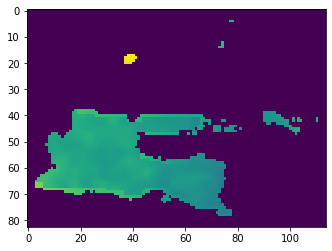

In [2]:
pickle_in = open("../Data_error/error_flatten.pickle","rb")
# data diload sudah dalam bentuk 1D
X = pickle.load(pickle_in)
# untuk menampilkan gambar data 1D -> 2D
plt.imshow(X[0].reshape(83,114))

In [3]:
X

[array([0., 0., 0., ..., 0., 0., 0.], dtype=float32),
 array([0., 0., 0., ..., 0., 0., 0.], dtype=float32),
 array([0., 0., 0., ..., 0., 0., 0.], dtype=float32),
 array([0., 0., 0., ..., 0., 0., 0.], dtype=float32),
 array([0., 0., 0., ..., 0., 0., 0.], dtype=float32),
 array([0., 0., 0., ..., 0., 0., 0.], dtype=float32),
 array([0., 0., 0., ..., 0., 0., 0.], dtype=float32),
 array([0., 0., 0., ..., 0., 0., 0.], dtype=float32),
 array([0., 0., 0., ..., 0., 0., 0.], dtype=float32),
 array([0., 0., 0., ..., 0., 0., 0.], dtype=float32),
 array([0., 0., 0., ..., 0., 0., 0.], dtype=float32),
 array([0., 0., 0., ..., 0., 0., 0.], dtype=float32),
 array([0., 0., 0., ..., 0., 0., 0.], dtype=float32),
 array([0., 0., 0., ..., 0., 0., 0.], dtype=float32),
 array([0., 0., 0., ..., 0., 0., 0.], dtype=float32),
 array([0., 0., 0., ..., 0., 0., 0.], dtype=float32),
 array([0., 0., 0., ..., 0., 0., 0.], dtype=float32),
 array([0., 0., 0., ..., 0., 0., 0.], dtype=float32),
 array([0., 0., 0., ..., 0.,

In [4]:
df = X
data_1 = df[:-48]
data_2 = df[:-36]
data_3 = df[:-24]
data_4 = df[:-12]
data_5 = df
# data tahun 1983-2011
df=df[:-60]

In [5]:
# train -> data 1983-2011
train, test = df, df[-24:]

In [6]:
np.array(train).shape[0]/12

28.0

In [7]:
scaler = MinMaxScaler()
scaler.fit(train)
scaler.fit(data_4)
scaler.fit(test)
train = scaler.transform(train)
data_4 = scaler.transform(data_4)
test = scaler.transform(test)

In [8]:
n_input = 12
n_features = 9462
batch_size=12
# supervised data
generator = TimeseriesGenerator(train, train, length=n_input, batch_size=batch_size)
validation_sequence = TimeseriesGenerator(test, test, length=n_input, batch_size=batch_size)

In [9]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
model = Sequential()
model.add(LSTM(10, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.05, seed=1), unit_forget_bias='zeros', input_shape=(n_input, n_features), return_sequences=False))
model.add(Dense(20, activation='sigmoid', kernel_initializer=RandomNormal(mean=0.0, stddev=0.05, seed=1)))
model.add(Dropout(0.2))
model.add(Dense(n_features, activation='sigmoid', kernel_initializer=RandomNormal(mean=0.0, stddev=0.05, seed=1)))
model.compile(optimizer='adam', loss='mae', metrics=['mae'])

Instructions for updating:
non-resource variables are not supported in the long term
Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 10)                378920    
_________________________________________________________________
dense (Dense)                (None, 20)                220       
_________________________________________________________________
dropout (Dropout)            (None, 20)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 9462)              198702    
Total params: 577,842
Trainable params: 577,842
Non-trainable params: 0
_________________________________________________________________


In [12]:
model.fit_generator(generator,epochs=90)

Epoch 1/90
27/27 [==============================] - 1s 21ms/step - loss: 0.0484 - mean_absolute_error: 0.0484
Epoch 2/90
27/27 [==============================] - 1s 21ms/step - loss: 0.0476 - mean_absolute_error: 0.0476
Epoch 3/90
27/27 [==============================] - 1s 25ms/step - loss: 0.0470 - mean_absolute_error: 0.0470
Epoch 4/90
27/27 [==============================] - 1s 21ms/step - loss: 0.0469 - mean_absolute_error: 0.0469
Epoch 5/90
27/27 [==============================] - 1s 21ms/step - loss: 0.0463 - mean_absolute_error: 0.0463
Epoch 6/90
27/27 [==============================] - 1s 26ms/step - loss: 0.0463 - mean_absolute_error: 0.0463
Epoch 7/90
27/27 [==============================] - 1s 21ms/step - loss: 0.0457 - mean_absolute_error: 0.0457
Epoch 8/90
27/27 [==============================] - 1s 26ms/step - loss: 0.0451 - mean_absolute_error: 0.0451
Epoch 9/90
27/27 [==============================] - 1s 21ms/step - loss: 0.0453 - mean_absolute_error: 0.0453
Epoch 10/9

27/27 [==============================] - 1s 26ms/step - loss: 0.0409 - mean_absolute_error: 0.0409
Epoch 75/90
27/27 [==============================] - 1s 21ms/step - loss: 0.0407 - mean_absolute_error: 0.0407
Epoch 76/90
27/27 [==============================] - 1s 25ms/step - loss: 0.0409 - mean_absolute_error: 0.0409
Epoch 77/90
27/27 [==============================] - 1s 26ms/step - loss: 0.0408 - mean_absolute_error: 0.0408
Epoch 78/90
27/27 [==============================] - 1s 21ms/step - loss: 0.0407 - mean_absolute_error: 0.0407
Epoch 79/90
27/27 [==============================] - 1s 21ms/step - loss: 0.0407 - mean_absolute_error: 0.0407
Epoch 80/90
27/27 [==============================] - 1s 21ms/step - loss: 0.0406 - mean_absolute_error: 0.0406
Epoch 81/90
27/27 [==============================] - 1s 26ms/step - loss: 0.0406 - mean_absolute_error: 0.0406
Epoch 82/90
27/27 [==============================] - 1s 21ms/step - loss: 0.0406 - mean_absolute_error: 0.0406
Epoch 83/90
2

In [13]:
model.evaluate_generator(validation_sequence)

Instructions for updating:
Please use Model.evaluate, which supports generators.


[0.044222187250852585, 0.044222187]

In [14]:
pred_list = []

batch = train[-12:].reshape((1, n_input, n_features))
batch

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]])

In [15]:
for i in range(n_input):   
    pred_list.append(model.predict(batch)[0]) 
    batch = np.append(batch[:,1:,:],[[pred_list[i]]],axis=1)

pred_list = scaler.inverse_transform(pred_list)

# prediksi = (model.predict(batch)[0])

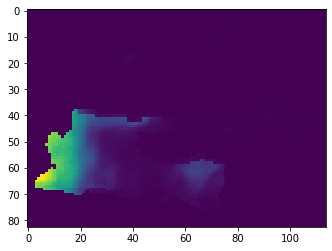

In [16]:
plt.imshow(pred_list[0].reshape(83,114))

In [17]:
train = df
test = df[-24:]

In [18]:
scaler.fit(train)
train = scaler.transform(train)
scaler.fit(test)
test = scaler.transform(test)

In [18]:
n_input = 12
n_features = 9462
generator = TimeseriesGenerator(train, train, length=n_input, batch_size=12)
validation_sequence = TimeseriesGenerator(test, test, length=n_input, batch_size=12)

In [19]:
model.fit_generator(generator,epochs=90)

Epoch 1/90
27/27 [==============================] - 1s 23ms/step - loss: 0.0406 - mean_absolute_error: 0.0406
Epoch 2/90
27/27 [==============================] - 1s 26ms/step - loss: 0.0404 - mean_absolute_error: 0.0404
Epoch 3/90
27/27 [==============================] - 1s 25ms/step - loss: 0.0407 - mean_absolute_error: 0.0407
Epoch 4/90
27/27 [==============================] - 1s 21ms/step - loss: 0.0406 - mean_absolute_error: 0.0406
Epoch 5/90
27/27 [==============================] - 1s 26ms/step - loss: 0.0405 - mean_absolute_error: 0.0405
Epoch 6/90
27/27 [==============================] - 1s 25ms/step - loss: 0.0405 - mean_absolute_error: 0.0405
Epoch 7/90
27/27 [==============================] - 1s 21ms/step - loss: 0.0405 - mean_absolute_error: 0.0405
Epoch 8/90
27/27 [==============================] - 1s 25ms/step - loss: 0.0407 - mean_absolute_error: 0.0407
Epoch 9/90
27/27 [==============================] - 1s 25ms/step - loss: 0.0405 - mean_absolute_error: 0.0405
Epoch 10/9

27/27 [==============================] - 1s 25ms/step - loss: 0.0403 - mean_absolute_error: 0.0403
Epoch 75/90
27/27 [==============================] - 1s 26ms/step - loss: 0.0401 - mean_absolute_error: 0.0401
Epoch 76/90
27/27 [==============================] - 1s 21ms/step - loss: 0.0403 - mean_absolute_error: 0.0403
Epoch 77/90
27/27 [==============================] - 1s 25ms/step - loss: 0.0401 - mean_absolute_error: 0.0401
Epoch 78/90
27/27 [==============================] - 1s 21ms/step - loss: 0.0402 - mean_absolute_error: 0.0402
Epoch 79/90
27/27 [==============================] - 1s 26ms/step - loss: 0.0402 - mean_absolute_error: 0.0402
Epoch 80/90
27/27 [==============================] - 1s 26ms/step - loss: 0.0402 - mean_absolute_error: 0.0402
Epoch 81/90
27/27 [==============================] - 1s 21ms/step - loss: 0.0402 - mean_absolute_error: 0.0402
Epoch 82/90
27/27 [==============================] - 1s 26ms/step - loss: 0.0403 - mean_absolute_error: 0.0403
Epoch 83/90
2

In [20]:
model.evaluate_generator(validation_sequence)

[0.04396459087729454, 0.04396459]

In [21]:
pred_list = []

batch = data_4[-60:-48].reshape((1, n_input, n_features))

for i in range(n_input):   
    pred_list.append(model.predict(batch)[0]) 
    batch = np.append(batch[:,1:,:],[[pred_list[i]]],axis=1)
    
batch1 = data_4[-48:-36].reshape((1, n_input, n_features))

for i in range(n_input):   
    pred_list.append(model.predict(batch1)[0]) 
    batch1 = np.append(batch1[:,1:,:],[[pred_list[i]]],axis=1)
    
batch2 = data_4[-36:-24].reshape((1, n_input, n_features))

for i in range(n_input):   
    pred_list.append(model.predict(batch2)[0]) 
    batch2 = np.append(batch2[:,1:,:],[[pred_list[i]]],axis=1)
    
# data tahun 2014 untuk memprediksi tahun 2015
batch3 = data_4[-24:-12].reshape((1, n_input, n_features))

for i in range(n_input):   
    pred_list.append(model.predict(batch3)[0]) 
    batch3 = np.append(batch3[:,1:,:],[[pred_list[i]]],axis=1)

# data tahun 2015 untuk memprediksi tahun 2016
batch4 = data_4[-12:].reshape((1, n_input, n_features))

for i in range(n_input):   
    pred_list.append(model.predict(batch4)[0]) 
    batch4 = np.append(batch4[:,1:,:],[[pred_list[i]]],axis=1)

In [22]:
batch

array([[[0.00010522, 0.00012092, 0.00011458, ..., 0.0001162 ,
         0.00012519, 0.00011941],
        [0.00010522, 0.00012092, 0.00011458, ..., 0.0001162 ,
         0.00012519, 0.00011941],
        [0.00010522, 0.00012092, 0.00011458, ..., 0.0001162 ,
         0.00012519, 0.00011941],
        ...,
        [0.00010727, 0.00012306, 0.00011653, ..., 0.0001185 ,
         0.00012744, 0.00012156],
        [0.00010593, 0.00012165, 0.00011524, ..., 0.00011699,
         0.00012597, 0.00012014],
        [0.00010535, 0.00012105, 0.0001147 , ..., 0.00011635,
         0.00012534, 0.00011954]]])

In [23]:
pred_list = scaler.inverse_transform(pred_list)
pred_list

array([[0.00010522, 0.00012092, 0.00011458, ..., 0.0001162 , 0.00012519,
        0.00011941],
       [0.00010522, 0.00012092, 0.00011458, ..., 0.0001162 , 0.00012519,
        0.00011941],
       [0.00010522, 0.00012092, 0.00011458, ..., 0.0001162 , 0.00012519,
        0.00011941],
       ...,
       [0.00010522, 0.00012092, 0.00011458, ..., 0.00011621, 0.00012519,
        0.00011941],
       [0.00010522, 0.00012092, 0.00011458, ..., 0.0001162 , 0.00012519,
        0.00011941],
       [0.00010522, 0.00012092, 0.00011458, ..., 0.0001162 , 0.00012519,
        0.00011941]])

In [24]:
pred_list.shape

(60, 9462)

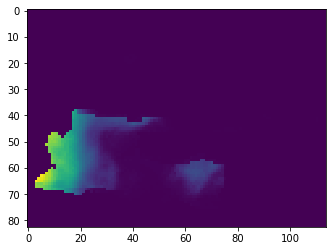

In [25]:
plt.imshow(pred_list[0].reshape(83,114))

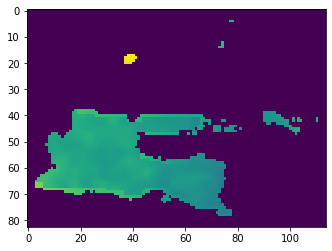

In [26]:
df_asli = data_1
plt.imshow(df_asli[0].reshape(83,114))

In [27]:
max(pred_list[10])

0.13953590979348007

In [28]:
max(df_asli[10])

0.017539296

In [30]:
# MAE untuk semua data
pred_list[pred_list<0]=0
pred_list_new=[]
df_asli_new=[]
no=0
df_asli=np.array(df_asli)
# for pred in pred_list:
#     pred_list_new.append(list(filter(lambda x: x != 0, pred_list[no])))
#     df_asli_new.append(list(filter(lambda x: x != 0, df_asli[no])))
#     no+=1
    
pred_list_new=np.array(pred_list_new)
df_asli_new=np.array(df_asli_new)

# pred_list.shape
# np.array(df_asli_new).shape

mae=[]
no=0
for pred1 in pred_list:
    mae_ = df_asli[no]-pred1
    mae_ = np.average(mae_)
    mae.append(mae_)
    no+=1

In [31]:
mae

[0.20397564786429437,
 0.19799407908413028,
 0.13565220677671208,
 0.03227146214987044,
 0.0,
 0.013539691650103797,
 0.0077425243442423635,
 0.017853925945608414,
 0.3128371186896173,
 0.0225322810455915,
 4.804569389651402e-06,
 0.03961919024963655,
 0.08030746891052067,
 0.11704301407639055,
 0.10304139026613322,
 0.028967227491699412,
 0.0,
 0.007850396729744797,
 0.02039808141961852,
 0.010513693430215038,
 0.1846666062493653,
 0.011509689774250648,
 6.874037704357093e-05,
 0.019457834898563883,
 0.05933874918262491,
 0.053033435097266116,
 0.06514446663348777,
 0.010462048405531806,
 0.0,
 0.007356666720180993,
 0.01070287978054883,
 0.02460748049445264,
 0.07514019386859186,
 0.010529744401429139,
 0.00039953559619008224,
 0.0,
 0.06275648833316468,
 0.025008668605877683,
 0.019958888492784925,
 0.0,
 0.0,
 0.0,
 0.0003356917118404387,
 0.009522215727381503,
 0.00929267298188669,
 0.0016805856516592381,
 0.00022174521698714873,
 1.3502024177519345e-05,
 0.17696069580030552,
 0.1

In [33]:
# pred_list_new

Pred_rata= []
for i in range(0,60):
	Pred_rata.append((pred_list[i].mean()))



In [34]:
df_asli_rata= []
for i in range(0,60):
	df_asli_rata.append((df_asli[i].mean()))

In [35]:
Pred_rata

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0]

In [36]:
df_asli_rata


[0.20397566,
 0.19799407,
 0.13565221,
 0.032271463,
 0.0,
 0.013539691,
 0.007742524,
 0.017853927,
 0.3128371,
 0.02253228,
 4.8045695e-06,
 0.03961919,
 0.080307476,
 0.11704302,
 0.1030414,
 0.028967226,
 0.0,
 0.007850396,
 0.020398082,
 0.010513693,
 0.1846666,
 0.0115096895,
 6.874037e-05,
 0.019457834,
 0.059338752,
 0.053033434,
 0.065144464,
 0.010462048,
 0.0,
 0.0073566665,
 0.010702879,
 0.024607481,
 0.07514019,
 0.010529744,
 0.00039953558,
 0.0,
 0.062756486,
 0.02500867,
 0.019958887,
 0.0,
 0.0,
 0.0,
 0.00033569173,
 0.009522216,
 0.009292673,
 0.0016805856,
 0.0002217452,
 1.3502024e-05,
 0.17696069,
 0.18594149,
 0.19720568,
 0.040911835,
 0.0,
 0.022085713,
 0.03119794,
 0.045924917,
 0.2649516,
 0.028108876,
 0.00019953931,
 5.2411167e-05]

In [37]:
# membuat index tanggal, agar mempudah dalam proses plotting data
awal = "2012-1"
awal = pd.to_datetime(awal)
from pandas.tseries.offsets import DateOffset
add_dates = [awal + DateOffset(months=x) for x in range(0,60) ]
add_dates

[Timestamp('2012-01-01 00:00:00'),
 Timestamp('2012-02-01 00:00:00'),
 Timestamp('2012-03-01 00:00:00'),
 Timestamp('2012-04-01 00:00:00'),
 Timestamp('2012-05-01 00:00:00'),
 Timestamp('2012-06-01 00:00:00'),
 Timestamp('2012-07-01 00:00:00'),
 Timestamp('2012-08-01 00:00:00'),
 Timestamp('2012-09-01 00:00:00'),
 Timestamp('2012-10-01 00:00:00'),
 Timestamp('2012-11-01 00:00:00'),
 Timestamp('2012-12-01 00:00:00'),
 Timestamp('2013-01-01 00:00:00'),
 Timestamp('2013-02-01 00:00:00'),
 Timestamp('2013-03-01 00:00:00'),
 Timestamp('2013-04-01 00:00:00'),
 Timestamp('2013-05-01 00:00:00'),
 Timestamp('2013-06-01 00:00:00'),
 Timestamp('2013-07-01 00:00:00'),
 Timestamp('2013-08-01 00:00:00'),
 Timestamp('2013-09-01 00:00:00'),
 Timestamp('2013-10-01 00:00:00'),
 Timestamp('2013-11-01 00:00:00'),
 Timestamp('2013-12-01 00:00:00'),
 Timestamp('2014-01-01 00:00:00'),
 Timestamp('2014-02-01 00:00:00'),
 Timestamp('2014-03-01 00:00:00'),
 Timestamp('2014-04-01 00:00:00'),
 Timestamp('2014-05-

In [38]:
len(add_dates)


60

In [39]:
len(Pred_rata)


60

In [40]:
len(df_asli_rata)

60

In [41]:
dict = {'bulan': add_dates, 'data ':mae}
df = pd.DataFrame(dict)

In [42]:
df

,bulan,data
0,2012-01-01,0.203976
1,2012-02-01,0.197994
2,2012-03-01,0.135652
3,2012-04-01,0.032271
4,2012-05-01,0.000000
5,2012-06-01,0.013540
6,2012-07-01,0.007743
7,2012-08-01,0.017854
8,2012-09-01,0.312837
9,2012-10-01,0.022532


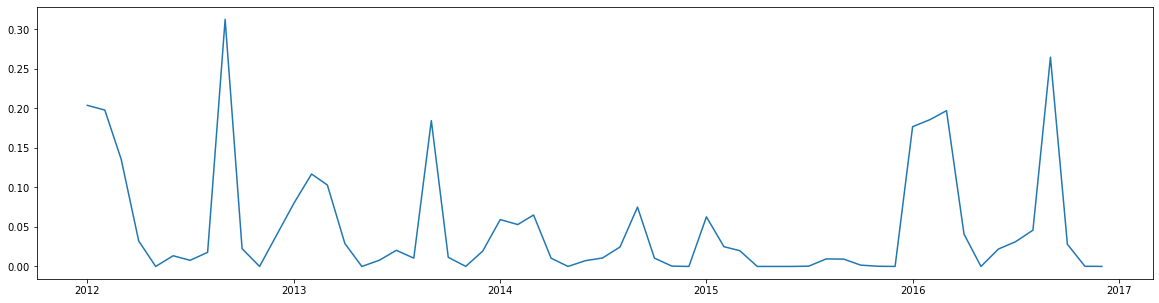

In [43]:
df = df.set_index("bulan")
plt.figure(figsize=(20, 5))
plt.plot(df.index,df)

In [44]:
dict = {'bulan': add_dates, 'data prediksi':Pred_rata, 'data asli':df_asli_rata}
df = pd.DataFrame(dict)
df


,bulan,data prediksi,data asli
0,2012-01-01,0.0,0.203976
1,2012-02-01,0.0,0.197994
2,2012-03-01,0.0,0.135652
3,2012-04-01,0.0,0.032271
4,2012-05-01,0.0,0.000000
5,2012-06-01,0.0,0.013540
6,2012-07-01,0.0,0.007743
7,2012-08-01,0.0,0.017854
8,2012-09-01,0.0,0.312837
9,2012-10-01,0.0,0.022532


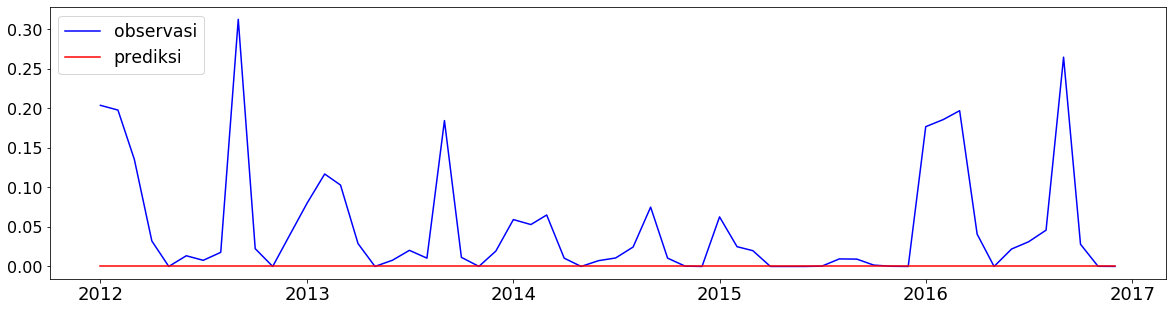

In [45]:
# df_asli = data_4
df = df.set_index("bulan")
plt.figure(figsize=(20, 5))
plt.plot(df.index, df_asli_rata[-60:], color='b', label="observasi")
plt.plot(df.index, Pred_rata[-60:], color='r', label="prediksi")
plt.legend(loc='best', fontsize='xx-large')
plt.xticks(fontsize=18)
plt.yticks(fontsize=16)
plt.show()

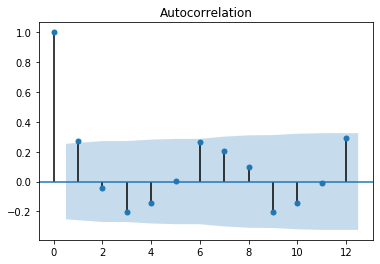

In [46]:
# # Time series data

# data = mae

 

# # Plot autocorrelation

# plt.acorr(data, maxlags=12)

 

# # Add labels to autocorrelation plot

# plt.title('Autocorrelation of LSTM')

# plt.xlabel('Lag')

# plt.ylabel('Autocorrelation')

 

# # Display the autocorrelation plot

# plt.show()

import statsmodels.tsa.api as smt

acf = smt.graphics.plot_acf(mae, lags=12 , alpha=0.05)
acf.show()

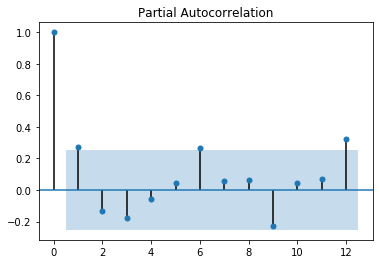

In [47]:
pacf = smt.graphics.plot_pacf(mae, lags=12 , alpha=0.05)
pacf.show()

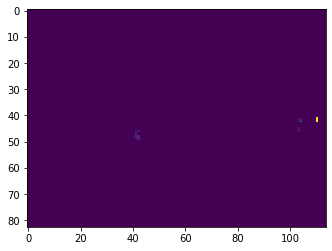

In [48]:
plt.imshow((df_asli[59]-pred_list[59]).reshape(83,114))

In [49]:
sum(mae)/60

0.05011488984518622

In [50]:
from skimage import io
# io.imsave('NewRaster/201201.tif', pred_list[0].reshape(83,114))

In [51]:
pred_list[pred_list==0]=-9999

In [52]:
no=0
for pred in pred_list:
    if(add_dates[no].month<10):
        nama_file = 'Raster_2/'+str(add_dates[no].year)+'0'+str(add_dates[no].month)+'.tif'
    else:
        nama_file = 'Raster_2/'+str(add_dates[no].year)+str(add_dates[no].month)+'.tif'
            
    io.imsave(nama_file, pred_list[no].reshape(83,114))
    no+=1
nama_file

'Raster_2/201612.tif'

In [53]:
model.save('LSTM10DENSE20_adam.h5')